### **Importing the requied packages** 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pydot
import graphviz

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Prediction using Unsupervised ML/Iris.csv')
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

### **Understanding the shape of the data**

In [ ]:
print("The shape of the data is:",data.shape)
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

The shape of the data is: (150, 6)
Number of rows: 150
Number of columns: 6


### **Knowing about the unique classes to be predicted**

---



In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### **Sepal_Length(in cms) Distribution**

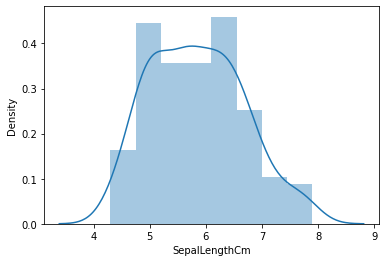

In [ ]:
sns.distplot(data['SepalLengthCm'])

### **Sepal_Width(in cms) Distribution**

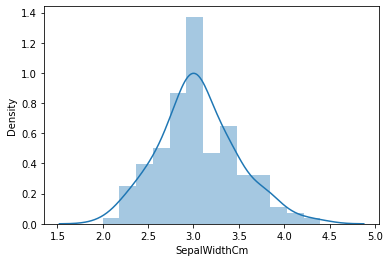

In [ ]:
sns.distplot(data['SepalWidthCm'])

### **Petal_Length(in cms) Distribution**

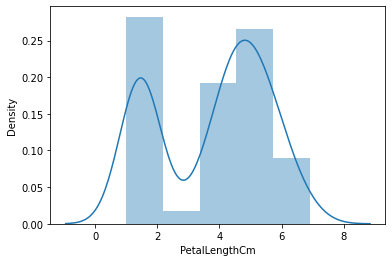

In [ ]:
sns.distplot(data['PetalLengthCm'])

### **Petal_Width(in cms) Distribution**

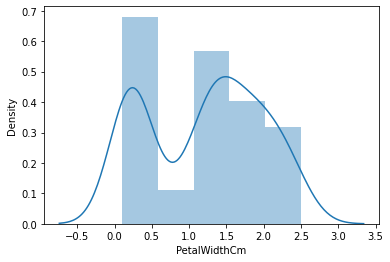

In [ ]:
sns.distplot(data['PetalWidthCm'])

### **Getting statistical insights of the features**

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Prediction using Unsupervised ML/Iris.csv',index_col=0)

In [ ]:
data1.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

### **Pair plot of the data**

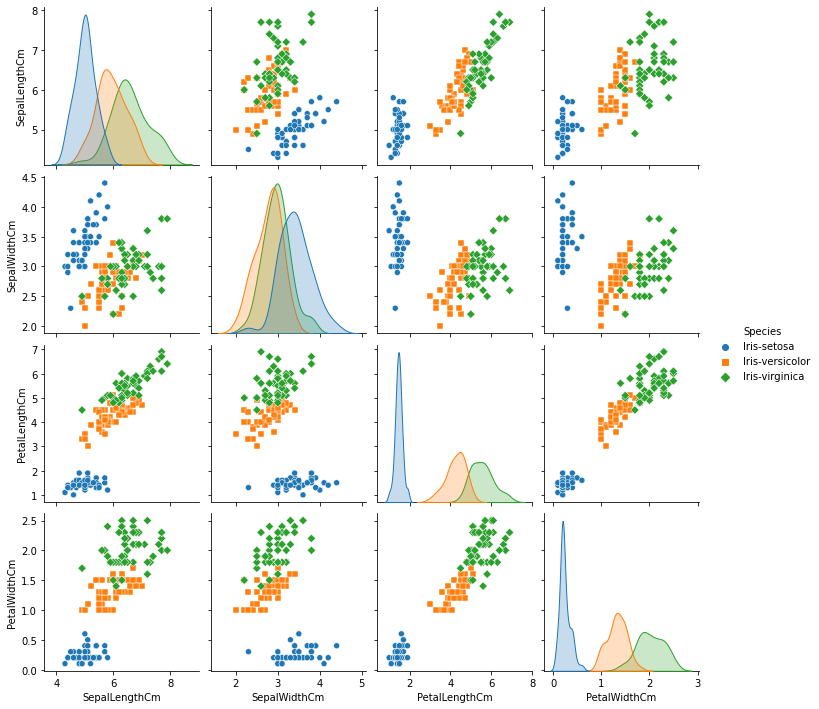

In [ ]:
sns.pairplot(data1, hue="Species", markers=["o", "s", "D"])

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**As we are doing unsupervised clustering, we need not class labels to train our data. We just need our features to predict the classes. <br>We will use k-means algorithm to find out the best number of clusters. We'll also display the clusters.**

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
features = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
features.head()
print(features.shape)

(150, 4)


### **Using K-Means Clustering Algorithm**

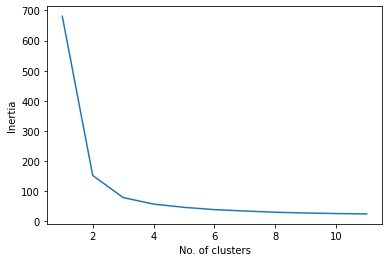

In [ ]:
inertias = [] 
K = range(1,12) 
dic = {}
for i in K:
    model = KMeans(n_clusters = i)
    model.fit(features)
    dic[i] = model.inertia_
plt.plot(list(dic.keys()), list(dic.values()))
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")
plt.show()

**From the above elbow method, we can see that k=3,4 is giving a good result in clustering.<br>Let's plot for individual cluster and check how good it differentiates from one species to other.**

##### **For K=1**

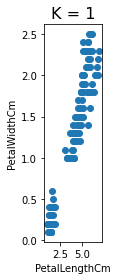

In [ ]:
plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)

##### **For K=2**

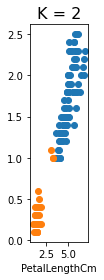

In [ ]:
plt.subplot(1,5,4)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

##### **For K=3**

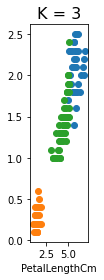

In [ ]:
plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

In [ ]:
features.drop(["labels"],axis=1,inplace=True)


##### **For K=4**

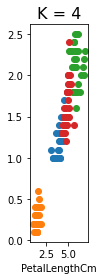

In [ ]:
plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])
features.drop(["labels"],axis=1,inplace=True)

**From the above visualizations we can clearly observe that 3 clusters gave very efficient results for petal lengths.**

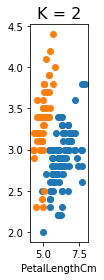

In [ ]:
plt.subplot(1,5,4)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])

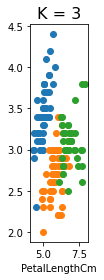

In [ ]:
plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])

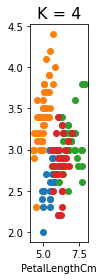

In [ ]:
plt.subplot(1,5,4)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])
plt.scatter(features.SepalLengthCm[features.labels == 3],features.SepalWidthCm[features.labels == 3])

**From the above visualizations we can clearly observe that 3 clusters gave very efficient results for Sepal lengths.**

**We can finally conclude that, k=3 is the best number of clusters to seperate one species to other.**